# Przygotowanie

Import bibliotek

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


Wczytanie danych

In [58]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [59]:
x_test.shape

(10000, 28, 28)

Wizualizacja losowych liczb

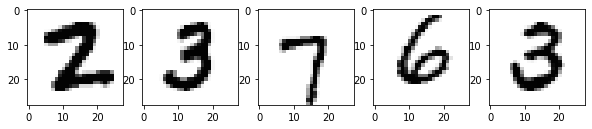

In [60]:
f, axes = plt.subplots(1, 5, figsize=(10,4))
for i in range(5):
  x = random.randint(0, len(x_train)+1)
  axes[i].imshow(x_train[x], cmap="Greys", interpolation='nearest')

Wybrana liczba w powiększeniu

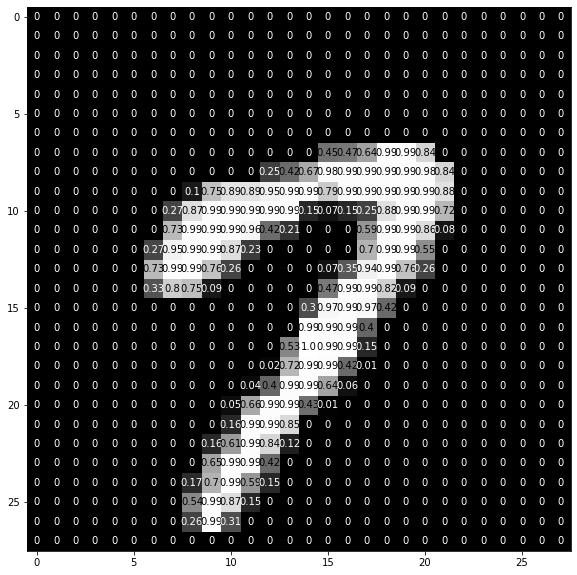

In [61]:
img = x_train[15]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max() / 2.5

for x in range(width):
  for y in range(height):
    val = round(img[x][y], 2) if img[x][y] != 0 else 0
    ax.annotate(str(val), xy=(y,x),
                horizontalalignment='center',
                verticalalignment='center',
                color='white' if img[x][y]<thresh else 'black'
                )

Konfiguracja i przygotowanie modelu

In [62]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Wyświetlenie architektury sieci

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Trenowanie modelu

In [64]:
history = model.fit(x_train, y_train, epochs=5, batch_size=10, validation_split=0.33)

Epoch 1/5
4020/4020 [==============================] - 25s 6ms/step - loss: 0.2320 - accuracy: 0.9297 - val_loss: 0.1182 - val_accuracy: 0.9648
Epoch 2/5
4020/4020 [==============================] - 25s 6ms/step - loss: 0.1103 - accuracy: 0.9665 - val_loss: 0.1222 - val_accuracy: 0.9643
Epoch 3/5
4020/4020 [==============================] - 24s 6ms/step - loss: 0.0816 - accuracy: 0.9736 - val_loss: 0.1078 - val_accuracy: 0.9693
Epoch 4/5
4020/4020 [==============================] - 25s 6ms/step - loss: 0.0622 - accuracy: 0.9799 - val_loss: 0.1359 - val_accuracy: 0.9645
Epoch 5/5
4020/4020 [==============================] - 23s 6ms/step - loss: 0.0533 - accuracy: 0.9833 - val_loss: 0.1128 - val_accuracy: 0.9731


Ewaluacja modelu

In [65]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1016 - accuracy: 0.9734


[0.10156877338886261, 0.9733999967575073]

In [66]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Wykresy z historią uczenia

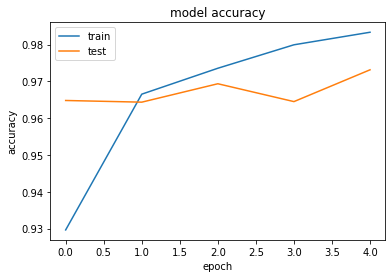

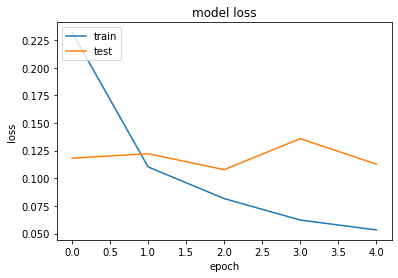

In [67]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Predykcja

Predykcja dla całej macierzy testowej (uwaga: tutaj miała niedawno miejsce zmiana API TensorFlow version 2.6) 
https://stackoverflow.com/questions/68836551/keras-attributeerror-sequential-object-has-no-attribute-predict-classes

In [68]:
x_predict = model.predict(x_test)
x_predict

313/313 [==============================] - 1s 3ms/step


array([[1.1051750e-11, 6.5197833e-11, 3.3729199e-09, ..., 9.9999171e-01,
        3.1532183e-11, 1.4482778e-09],
       [1.7135163e-14, 2.9945932e-07, 9.9999958e-01, ..., 1.3777236e-18,
        5.1245824e-13, 2.9378962e-22],
       [1.8082279e-11, 9.9999529e-01, 5.9106686e-08, ..., 4.5625220e-06,
        7.8455935e-09, 1.5997242e-10],
       ...,
       [4.6773652e-17, 1.4811310e-13, 5.0646438e-15, ..., 1.4717390e-10,
        2.3127399e-10, 5.3300973e-09],
       [1.6254779e-12, 7.4787690e-15, 1.6131810e-17, ..., 5.4392298e-13,
        4.3289634e-05, 1.0444670e-12],
       [2.3206469e-12, 2.3731056e-17, 5.1705454e-12, ..., 1.1176862e-20,
        1.6146569e-14, 7.1502794e-15]], dtype=float32)

Odtworzenie nazw klas

In [70]:
predicted_classes = np.argmax(x_predict, axis=1)
predicted_classes

array([7, 2, 1, ..., 4, 5, 6])

Przykład dla pojedynczego obrazka

In [71]:
img = x_test[3]
img.shape

(28, 28)

In [72]:
IMG_SIZE = 28

Wizualizacja cyfry

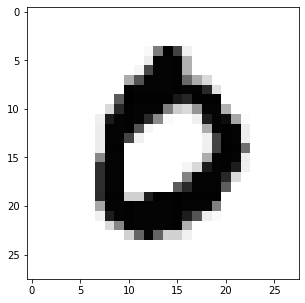

In [73]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(img, cmap="Greys", interpolation='nearest')

In [74]:
predicted_class = np.argmax(model.predict(np.array([img])), axis=1)
predicted_class

1/1 [==============================] - 0s 21ms/step


array([0])

Własna cyfra z numpy

In [75]:
dig7 = [[0,0,0,0,0,0,0],
        [0,0,1,1,1,1,0],
        [0,0,0,0,0,1,0],
        [0,0,0,0,0,1,0],
        [0,0,0,0,0,1,0],
        [0,0,0,0,0,1,0],
        [0,0,0,0,0,0,0]]
img = np.kron(dig7, np.ones((4,4)))
img.shape

(28, 28)

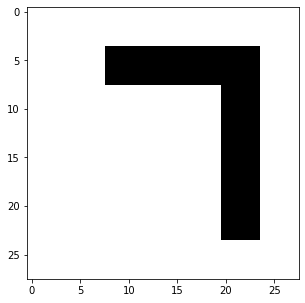

In [76]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(img, cmap="Greys", interpolation='nearest')

In [78]:
predicted_class = np.argmax(model.predict(np.array([img])), axis=1)
predicted_class

1/1 [==============================] - 0s 23ms/step


array([2])

Własna cyfra wczytana z pliku

In [79]:
from google.colab import files
files.upload()

Saving obrazek.png to obrazek.png


{'obrazek.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01V\x00\x00\x01\x1a\x08\x06\x00\x00\x00J5\x7f\x94\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc2\x00\x00\x0e\xc2\x01\x15(J\x80\x00\x00\x1f7IDATx^\xed\xdd{\xd0UU\xfd\xc7\xf1\xc5\x8f\x9b\x08\x88\xa8\x80\xdc%!nr\r\x05\nG\xc7\x1c\xa5\x9aI\xa4\x0c\xd3I.5A\xa3\xa1\xe6\x1fN6\x91\xfd\x03MYj3\x94\xd6\x8c`SAY\xa8M\x859]@\x12\xc5q\x02\x11D\x05\x11\x11\x15A\x04\xe2\xa6\xa0\xf1\xf3\xb3\x9e\xb5`?\x87s\xd9\xfb\x9cu\x9es\xf6>\xef\xd7\xcc\x99g\xef\xcd\xc5\xe7y\xe4\xf9\x9c\xef\xfe\xae\xb5\xd7je\x8c9\xfe\xd1\x0b\x00\x10\xc8\xff\xb9\x8f\x00\x80@\x08V\x00\x08\x8c`\x05\x80\xc0\x08V\x00\x08\x8c`\x05\x80\xc0\x08V\x00\x08\x8c`\x05\x80\xc0\x08V\x00\x08\x8c`\x05\x80\xc0\x08V\x00\x08\x8c`\x05\x80\xc0\x08V\x00\x08\x8c`\x05\x80\xc0\x08V\x00\x08\x8c`\x05\x80\xc0\x08V\x00\x08\x8c`\x05\x80\xc0\x08V\x00\x08\x8c`\x05\x80\xc0\x08V\x00\x08\x8c`\x05\x80\xc0\x08V\x00\x08\x8c`\x05\x80\xc0

In [51]:
import os
os.listdir()

['.config', '.ipynb_checkpoints', 'obrazek.png', 'sample_data']

Wczytaniu pliku do tablicy

In [80]:
import cv2

IMG_SIZE = 28
img_array=cv2.imread("obrazek.png", 0)
img_array = img_array/255.0
img_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
img_array.shape

(28, 28)

Wizualizacja cyfry

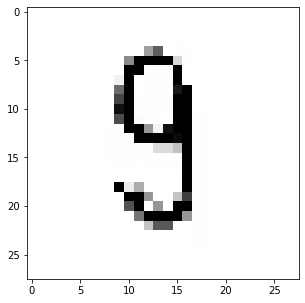

In [81]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(img_array, cmap="Greys", interpolation='nearest')

In [82]:
img_array = img_array.reshape(-1,IMG_SIZE,IMG_SIZE)
predicted_class = np.argmax(model.predict(np.array(img_array)), axis=1)
predicted_class

1/1 [==============================] - 0s 20ms/step


array([9])